# Packages

In [1]:
import numpy              as np
import pandas             as pd
import matplotlib.pyplot  as plt
import seaborn            as sns
import arviz
import time
import os
from mpl_toolkits.mplot3d import Axes3D

# Paths and dataset

In [2]:
results_path = '../../LargeFilesResults/Model'  # where the outputs of this notebook will be saved

In [ ]:
betas_cols = list(np.arange(start=3, stop=28, step=1))

In [12]:
posteriors = pd.read_csv(os.path.join(results_path, 'posteriors_shared_revised.csv'))
summary    = pd.read_csv(os.path.join(results_path, 'fit_summary_shared_revised.csv'))

In [4]:
parameters = summary[['LOG_STELLAR_MASS', 'Z']]

In [5]:
param_short = parameters.iloc[:900]

# Posteriors

In [13]:
posteriors

,"beta[1,1]","beta[2,1]","beta[3,1]","beta[4,1]","beta[5,1]","beta[1,2]","beta[2,2]","beta[3,2]","beta[4,2]","beta[5,2]",...,"beta[1,4]","beta[2,4]","beta[3,4]","beta[4,4]","beta[5,4]","beta[1,5]","beta[2,5]","beta[3,5]","beta[4,5]","beta[5,5]"
0,-0.309583,-0.184978,0.098762,0.336978,0.087993,0.096050,0.081527,0.409953,0.239594,-0.119246,...,0.009165,0.112084,-0.236322,-0.150935,0.200747,-0.130422,-0.074032,-0.112320,-0.050230,0.077850
1,-0.366925,-0.070095,-0.154836,0.050425,-0.050647,-0.369984,-0.236605,-0.625450,0.074859,-0.071859,...,-0.382262,-0.063275,-0.097586,0.135555,-0.344922,-0.261588,-0.152749,-0.185862,-0.106187,0.265835
2,-0.206103,-0.279341,-0.467257,0.101374,0.051104,-0.115894,-0.038289,0.021901,0.021022,-0.076103,...,-0.181172,0.057353,-0.080851,-0.137627,0.149963,-0.105352,-0.093101,0.044917,0.046908,0.065496
3,-0.888321,0.265480,0.636752,0.364031,0.002859,-0.288861,-0.077876,0.093481,0.337827,-0.031784,...,-0.248447,-0.245115,0.221660,0.353162,-0.432378,-0.297415,-0.128207,-0.262872,-0.047048,0.097798
4,-0.474970,-0.407050,-0.575108,0.576415,0.276032,-0.164269,-0.266924,-0.149182,0.218332,-0.116323,...,-0.152403,-0.327748,-0.294202,0.180023,-0.504377,-0.355569,-0.138539,-0.001107,0.007361,0.435819
5,-0.642277,0.383838,-0.111916,0.504997,-0.106820,-0.061612,-0.360598,-0.042493,0.383482,-0.056340,...,-0.430325,-0.486360,0.324560,-0.120369,0.077016,-0.466458,-0.016386,0.437283,-0.172023,0.138360
6,-0.724355,0.236313,-0.046770,0.451486,-0.070792,-0.092780,-0.238764,0.045248,0.453660,-0.074429,...,-0.416353,-0.440660,0.338193,-0.049457,0.185267,-0.469605,-0.010492,0.311142,-0.209303,0.169126
7,-0.322892,-0.229903,0.050815,0.016559,0.187979,-0.174388,0.131199,-0.010714,-0.032307,-0.202035,...,0.129997,0.357902,-0.192346,0.324074,-0.357461,0.043893,-0.037686,-0.223510,0.177161,-0.004236
8,-0.579104,0.346841,-0.378926,0.314959,-0.197096,0.031906,-0.413913,-0.027396,0.240953,-0.037123,...,-0.508757,-0.181405,-0.107959,0.084212,-0.258051,-0.051074,-0.200452,-0.028787,0.021697,0.032311
9,-0.490468,0.486096,-0.424368,0.396375,-0.126146,0.019663,-0.367052,-0.223561,0.203445,-0.069084,...,-0.688688,-0.229549,0.044189,0.069237,-0.021879,-0.007813,-0.109113,0.018874,-0.024005,-0.037934


In [43]:
whan_classes = ['Not classified', 'Retired/Passive', 'wAGN', 'sAGN', 'SF']
palette      = np.array(['#e41a1c', '#ff7f00', '#4daf4a', '#377eb8','#984ea3'])
figsize      = (18, 18)
alpha        = 0.4

In [44]:
dimensions = posteriors.columns.values.reshape(5,5)
rows       = dimensions[:,0].size
columns    = dimensions[0,:].size

<IPython.core.display.Javascript object>


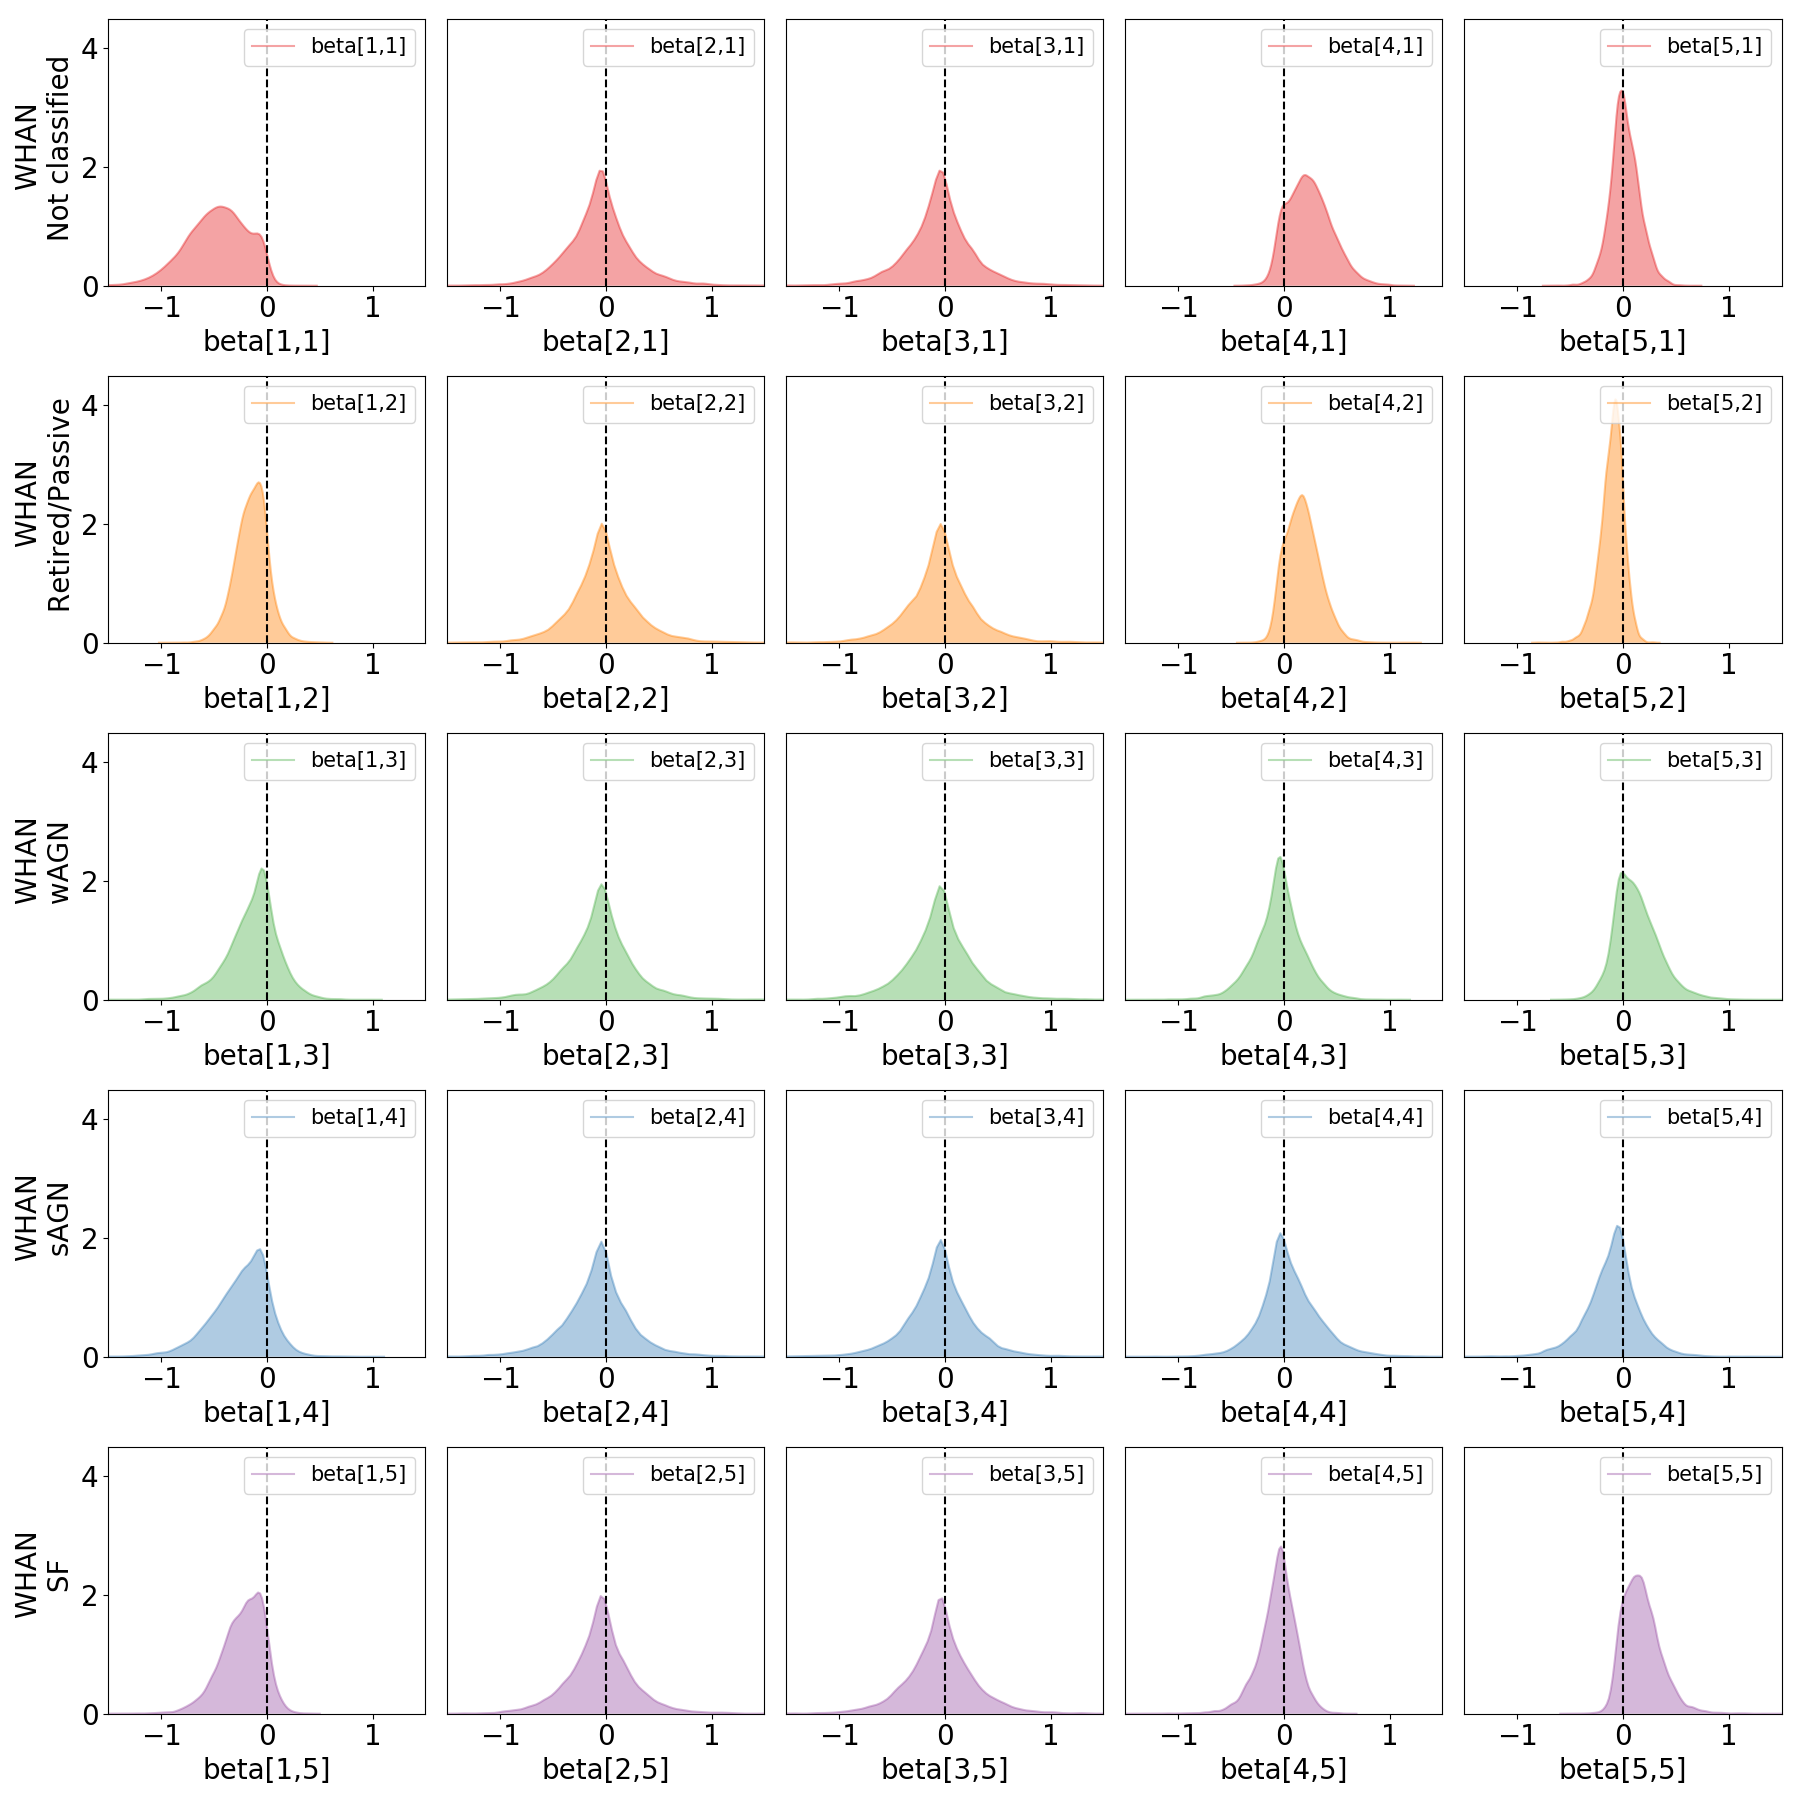

/home/mlldantas/anaconda3/envs/py3k6/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [133]:
plt.subplots(figsize=figsize)
position = 1
for each_beta in range(rows):
    for each_class in range(columns):
        name_temp = posteriors.columns.values.reshape(rows, columns)[each_beta,each_class]
        plot_temp = plt.subplot(rows, columns, position)
        sns.kdeplot(posteriors['%s' % str(name_temp)], shade=True, alpha=alpha, color=palette[each_beta])
        plt.legend(loc='upper right', fontsize=15)
        plt.axvline(x=0, linestyle="--", color='black')
        plt.xlabel(r"%s" % str(name_temp), fontsize=20)
        plt.tick_params('both', labelsize='20')
        plt.xlim([-1.5,1.5])
        plt.ylim([0,4.5])      
        if (each_class==0):
            plt.ylabel("$\,$ WHAN \n %s" % whan_classes[each_beta], fontsize=20)       
        elif (each_class!=0): 
            plot_temp.yaxis.set_visible(False)            
        position+=1

plt.tight_layout()
plt.savefig(os.path.join(results_path, '25betas_shared_revised.png'), bbox_inch='tight')
plt.savefig(os.path.join(results_path, '25betas_shared_revised.pdf'), bbox_inch='tight')
plt.show()

# Simplifying the probabilities' dataframe

In [73]:
entire_fit = pd.read_csv(os.path.join(results_path, 'entirefit_shared_revised.csv'))

In [74]:
entire_fit.keys()

Index(['chain', 'draw', 'warmup', 'beta[1,1]', 'beta[2,1]', 'beta[3,1]',
       'beta[4,1]', 'beta[5,1]', 'beta[1,2]', 'beta[2,2]',
       ...
       'eta05[898]', 'eta05[899]', 'eta05[900]', 'lp__', 'accept_stat__',
       'stepsize__', 'treedepth__', 'n_leapfrog__', 'divergent__', 'energy__'],
      dtype='object', length=9037)

In [75]:
header = np.array(entire_fit.keys())

In [76]:
prob_keys = []
for i in header:
    if i[0:4]=='prob':
        prob_keys.append(i)
    else:
        continue

In [77]:
probabilities = entire_fit[prob_keys]

In [78]:
probabilities

,prob01[1],prob01[2],prob01[3],prob01[4],prob01[5],prob01[6],prob01[7],prob01[8],prob01[9],prob01[10],...,prob05[891],prob05[892],prob05[893],prob05[894],prob05[895],prob05[896],prob05[897],prob05[898],prob05[899],prob05[900]
0,0.353221,0.352564,0.351920,0.351289,0.350672,0.350068,0.349478,0.348901,0.348337,0.347787,...,0.483644,0.482936,0.482211,0.481471,0.480715,0.479942,0.479154,0.478349,0.477529,0.476693
1,0.301349,0.301015,0.300662,0.300291,0.299901,0.299493,0.299066,0.298621,0.298158,0.297677,...,0.534076,0.532781,0.531458,0.530108,0.528732,0.527328,0.525897,0.524439,0.522954,0.521442
2,0.463077,0.461600,0.460056,0.458446,0.456771,0.455030,0.453223,0.451352,0.449415,0.447414,...,0.525017,0.524781,0.524551,0.524329,0.524112,0.523902,0.523698,0.523501,0.523310,0.523126
3,0.143205,0.143961,0.144766,0.145620,0.146524,0.147479,0.148484,0.149542,0.150654,0.151818,...,0.443980,0.442531,0.441045,0.439523,0.437965,0.436371,0.434741,0.433075,0.431374,0.429638
4,0.462164,0.460079,0.457914,0.455669,0.453343,0.450938,0.448453,0.445889,0.443247,0.440526,...,0.663378,0.662850,0.662322,0.661793,0.661263,0.660733,0.660202,0.659671,0.659139,0.658606
5,0.066926,0.067315,0.067703,0.068088,0.068471,0.068852,0.069231,0.069607,0.069982,0.070354,...,0.418519,0.419950,0.421444,0.423001,0.424621,0.426304,0.428050,0.429859,0.431732,0.433669
6,0.087237,0.087546,0.087855,0.088162,0.088469,0.088774,0.089077,0.089380,0.089681,0.089981,...,0.417515,0.418537,0.419604,0.420715,0.421871,0.423071,0.424315,0.425605,0.426939,0.428317
7,0.705598,0.704815,0.704037,0.703265,0.702497,0.701734,0.700976,0.700223,0.699475,0.698732,...,0.564590,0.563659,0.562696,0.561701,0.560674,0.559615,0.558523,0.557400,0.556243,0.555055
8,0.063734,0.064027,0.064308,0.064576,0.064833,0.065078,0.065310,0.065530,0.065736,0.065930,...,0.494181,0.493230,0.492276,0.491317,0.490354,0.489387,0.488417,0.487442,0.486463,0.485480
9,0.088998,0.089578,0.090142,0.090689,0.091219,0.091731,0.092226,0.092702,0.093160,0.093599,...,0.454931,0.454538,0.454148,0.453761,0.453377,0.452995,0.452616,0.452240,0.451866,0.451496


In [79]:
probabilities_transposed = probabilities.T

In [80]:
print(probabilities_transposed.columns)

RangeIndex(start=0, stop=12000, step=1)


In [81]:
iterations = probabilities_transposed.columns.size
new_header = []
for i in range(iterations):
    new_header.append('itr%i' % i)
print(len(new_header))

12000


In [82]:
probabilities_transposed.columns = new_header

In [83]:
probabilities_transposed

,itr0,itr1,itr2,itr3,itr4,itr5,itr6,itr7,itr8,itr9,...,itr11990,itr11991,itr11992,itr11993,itr11994,itr11995,itr11996,itr11997,itr11998,itr11999
prob01[1],0.353221,0.301349,0.463077,0.143205,0.462164,0.066926,0.087237,0.705598,0.063734,0.088998,...,0.205378,0.411295,0.054236,0.265067,0.225466,0.464575,0.142405,0.146930,0.521838,0.513421
prob01[2],0.352564,0.301015,0.461600,0.143961,0.460079,0.067315,0.087546,0.704815,0.064027,0.089578,...,0.204281,0.412115,0.053985,0.265896,0.226269,0.463550,0.142643,0.146590,0.524640,0.515674
prob01[3],0.351920,0.300662,0.460056,0.144766,0.457914,0.067703,0.087855,0.704037,0.064308,0.090142,...,0.203168,0.412952,0.053734,0.266731,0.227097,0.462562,0.142855,0.146232,0.527476,0.517932
prob01[4],0.351289,0.300291,0.458446,0.145620,0.455669,0.068088,0.088162,0.703265,0.064576,0.090689,...,0.202040,0.413807,0.053481,0.267573,0.227949,0.461611,0.143041,0.145855,0.530345,0.520193
prob01[5],0.350672,0.299901,0.456771,0.146524,0.453343,0.068471,0.088469,0.702497,0.064833,0.091219,...,0.200895,0.414679,0.053228,0.268421,0.228826,0.460698,0.143200,0.145460,0.533247,0.522458
prob01[6],0.350068,0.299493,0.455030,0.147479,0.450938,0.068852,0.088774,0.701734,0.065078,0.091731,...,0.199735,0.415570,0.052973,0.269275,0.229727,0.459821,0.143332,0.145046,0.536182,0.524727
prob01[7],0.349478,0.299066,0.453223,0.148484,0.448453,0.069231,0.089077,0.700976,0.065310,0.092226,...,0.198559,0.416477,0.052718,0.270136,0.230654,0.458983,0.143438,0.144614,0.539149,0.527000
prob01[8],0.348901,0.298621,0.451352,0.149542,0.445889,0.069607,0.089380,0.700223,0.065530,0.092702,...,0.197368,0.417403,0.052462,0.271004,0.231605,0.458181,0.143517,0.144164,0.542148,0.529277
prob01[9],0.348337,0.298158,0.449415,0.150654,0.443247,0.069982,0.089681,0.699475,0.065736,0.093160,...,0.196163,0.418346,0.052205,0.271879,0.232583,0.457417,0.143569,0.143696,0.545180,0.531558
prob01[10],0.347787,0.297677,0.447414,0.151818,0.440526,0.070354,0.089981,0.698732,0.065930,0.093599,...,0.194943,0.419306,0.051948,0.272760,0.233585,0.456690,0.143595,0.143211,0.548242,0.533842


In [84]:
percentiles = [0.025, 0.25, 0.50, 0.75, 0.975]

In [85]:
lines = probabilities_transposed.iloc[:, 0].size

for i in range(lines):   
    if i==0:
        stats_temp    = probabilities_transposed.iloc[i, :].describe(percentiles=percentiles)
        shrinked_temp = pd.DataFrame(stats_temp)
    else:
        stats_temp    = pd.DataFrame(probabilities_transposed.iloc[i, :].describe(percentiles=percentiles))
        shrinked_temp = shrinked_temp.join(stats_temp)
shrinked_df = shrinked_temp.T
shrinked_df

,count,mean,std,min,2.5%,25%,50%,75%,97.5%,max
prob01[1],12000.0,0.315902,0.179403,0.000417,0.034279,0.170633,0.302145,0.441467,0.706428,0.956633
prob01[2],12000.0,0.315678,0.179307,0.000424,0.034380,0.170742,0.301666,0.441000,0.706667,0.957794
prob01[3],12000.0,0.315449,0.179214,0.000431,0.034362,0.170461,0.301193,0.440497,0.707399,0.958916
prob01[4],12000.0,0.315216,0.179122,0.000439,0.034286,0.170435,0.300973,0.440184,0.706768,0.960000
prob01[5],12000.0,0.314979,0.179032,0.000447,0.034276,0.170625,0.300623,0.439804,0.706834,0.961047
prob01[6],12000.0,0.314738,0.178945,0.000455,0.034379,0.170415,0.299976,0.439402,0.707356,0.962059
prob01[7],12000.0,0.314493,0.178860,0.000463,0.034257,0.170111,0.299847,0.438758,0.708189,0.963037
prob01[8],12000.0,0.314243,0.178778,0.000471,0.034319,0.169560,0.299472,0.438277,0.708812,0.963982
prob01[9],12000.0,0.313989,0.178699,0.000480,0.034233,0.169444,0.299380,0.437490,0.708594,0.964895
prob01[10],12000.0,0.313732,0.178623,0.000488,0.034197,0.169355,0.299439,0.437210,0.708542,0.965778


In [86]:
print(shrinked_df.values.shape, parameters.shape)

(4500, 10) (4500, 2)


In [87]:
loc = shrinked_df.iloc[0, :].size
print(loc)

10


In [88]:
shrinked_df.insert(loc=loc, value=parameters['LOG_STELLAR_MASS'].values, column='LOG_STELLAR_MASS')

In [89]:
shrinked_df.insert(loc=(loc+1), value=parameters['Z'].values, column='Z')

In [90]:
shrinked_df

,count,mean,std,min,2.5%,25%,50%,75%,97.5%,max,LOG_STELLAR_MASS,Z
prob01[1],12000.0,0.315902,0.179403,0.000417,0.034279,0.170633,0.302145,0.441467,0.706428,0.956633,9.0,0.067940
prob01[2],12000.0,0.315678,0.179307,0.000424,0.034380,0.170742,0.301666,0.441000,0.706667,0.957794,9.0,0.084889
prob01[3],12000.0,0.315449,0.179214,0.000431,0.034362,0.170461,0.301193,0.440497,0.707399,0.958916,9.0,0.101837
prob01[4],12000.0,0.315216,0.179122,0.000439,0.034286,0.170435,0.300973,0.440184,0.706768,0.960000,9.0,0.118786
prob01[5],12000.0,0.314979,0.179032,0.000447,0.034276,0.170625,0.300623,0.439804,0.706834,0.961047,9.0,0.135734
prob01[6],12000.0,0.314738,0.178945,0.000455,0.034379,0.170415,0.299976,0.439402,0.707356,0.962059,9.0,0.152683
prob01[7],12000.0,0.314493,0.178860,0.000463,0.034257,0.170111,0.299847,0.438758,0.708189,0.963037,9.0,0.169632
prob01[8],12000.0,0.314243,0.178778,0.000471,0.034319,0.169560,0.299472,0.438277,0.708812,0.963982,9.0,0.186580
prob01[9],12000.0,0.313989,0.178699,0.000480,0.034233,0.169444,0.299380,0.437490,0.708594,0.964895,9.0,0.203529
prob01[10],12000.0,0.313732,0.178623,0.000488,0.034197,0.169355,0.299439,0.437210,0.708542,0.965778,9.0,0.220478


In [91]:
shrinked_df.to_csv(os.path.join(results_path, 'allprobabilities_summ_revised.csv'))

In [92]:
step = 900
prob01 = shrinked_df.iloc[:step, :]
prob02 = shrinked_df.iloc[step:(step*2), :]
prob03 = shrinked_df.iloc[(step*2):(step*3), :]
prob04 = shrinked_df.iloc[(step*3):(step*4), :]
prob05 = shrinked_df.iloc[(step*4):(step*5), :]

### Testing first class

In [93]:
zu = np.unique(prob01['LOG_STELLAR_MASS'].values)

In [94]:
subset = prob01[prob01['LOG_STELLAR_MASS'].values==zu[6]]

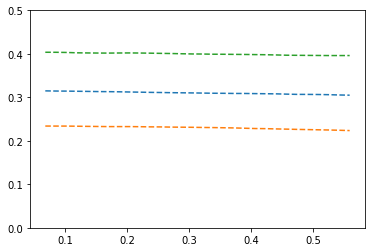

In [95]:
plt.plot(subset['Z'], subset['50%'], '--')
plt.plot(subset['Z'], subset['25%'], '--')
plt.plot(subset['Z'], subset['75%'], '--')
plt.ylim([0,0.5])
plt.show()

In [ ]:
np.unique(prob01['Z'].values)

In [ ]:
subset = prob01[prob01['Z']<0.07]

In [ ]:
subset

In [ ]:
plt.plot(subset['LOG_STELLAR_MASS'], subset['mean'], '--')
plt.plot(subset['LOG_STELLAR_MASS'], subset['25%'], '--')
plt.plot(subset['LOG_STELLAR_MASS'], subset['75%'], '--')
plt.show()

# Checking automatic summary from STAN

In [98]:
summary_stan = pd.read_csv(os.path.join(results_path, 'fit_summary_shared_revised.csv'))

In [99]:
summary_stan

,parameter,mean,se_mean,sd,2.5%,25%,50%,75%,97.5%,n_eff,Rhat,Z,LOG_STELLAR_MASS
0,prob01[1],0.3159,0.0045,0.1794,0.0342,0.1706,0.3021,0.4414,0.7066,1527,1.0038,0.067940,9.0
1,prob01[2],0.3156,0.0046,0.1793,0.0343,0.1707,0.3016,0.4410,0.7070,1522,1.0038,0.084889,9.0
2,prob01[3],0.3154,0.0046,0.1792,0.0343,0.1704,0.3011,0.4405,0.7074,1518,1.0038,0.101837,9.0
3,prob01[4],0.3152,0.0046,0.1791,0.0342,0.1704,0.3009,0.4401,0.7070,1513,1.0038,0.118786,9.0
4,prob01[5],0.3149,0.0046,0.1790,0.0342,0.1706,0.3006,0.4398,0.7072,1509,1.0038,0.135734,9.0
5,prob01[6],0.3147,0.0046,0.1789,0.0343,0.1704,0.2999,0.4394,0.7075,1505,1.0038,0.152683,9.0
6,prob01[7],0.3144,0.0046,0.1788,0.0342,0.1700,0.2998,0.4387,0.7082,1501,1.0038,0.169632,9.0
7,prob01[8],0.3142,0.0046,0.1787,0.0342,0.1695,0.2994,0.4383,0.7088,1498,1.0038,0.186580,9.0
8,prob01[9],0.3139,0.0046,0.1787,0.0341,0.1694,0.2993,0.4375,0.7088,1495,1.0038,0.203529,9.0
9,prob01[10],0.3137,0.0046,0.1786,0.0341,0.1693,0.2994,0.4372,0.7085,1492,1.0038,0.220478,9.0


In [100]:
prob01_stan = summary_stan.iloc[:900, :]

In [101]:
prob01_stan

,parameter,mean,se_mean,sd,2.5%,25%,50%,75%,97.5%,n_eff,Rhat,Z,LOG_STELLAR_MASS
0,prob01[1],0.3159,0.0045,0.1794,0.0342,0.1706,0.3021,0.4414,0.7066,1527,1.0038,0.067940,9.0
1,prob01[2],0.3156,0.0046,0.1793,0.0343,0.1707,0.3016,0.4410,0.7070,1522,1.0038,0.084889,9.0
2,prob01[3],0.3154,0.0046,0.1792,0.0343,0.1704,0.3011,0.4405,0.7074,1518,1.0038,0.101837,9.0
3,prob01[4],0.3152,0.0046,0.1791,0.0342,0.1704,0.3009,0.4401,0.7070,1513,1.0038,0.118786,9.0
4,prob01[5],0.3149,0.0046,0.1790,0.0342,0.1706,0.3006,0.4398,0.7072,1509,1.0038,0.135734,9.0
5,prob01[6],0.3147,0.0046,0.1789,0.0343,0.1704,0.2999,0.4394,0.7075,1505,1.0038,0.152683,9.0
6,prob01[7],0.3144,0.0046,0.1788,0.0342,0.1700,0.2998,0.4387,0.7082,1501,1.0038,0.169632,9.0
7,prob01[8],0.3142,0.0046,0.1787,0.0342,0.1695,0.2994,0.4383,0.7088,1498,1.0038,0.186580,9.0
8,prob01[9],0.3139,0.0046,0.1787,0.0341,0.1694,0.2993,0.4375,0.7088,1495,1.0038,0.203529,9.0
9,prob01[10],0.3137,0.0046,0.1786,0.0341,0.1693,0.2994,0.4372,0.7085,1492,1.0038,0.220478,9.0


In [104]:
chosen_mass = np.unique(prob01_stan['LOG_STELLAR_MASS'].values)[12]

In [105]:
chosen_mass

9.827586206896553

In [106]:
subset_temp = prob01_stan[prob01_stan['LOG_STELLAR_MASS']==chosen_mass]

In [107]:
subset_temp

,parameter,mean,se_mean,sd,2.5%,25%,50%,75%,97.5%,n_eff,Rhat,Z,LOG_STELLAR_MASS
360,prob01[361],0.3438,0.007,0.0790,0.1986,0.2865,0.3399,0.3988,0.4942,127,1.0297,0.067940,9.827586
361,prob01[362],0.3435,0.007,0.0789,0.1984,0.2864,0.3396,0.3986,0.4939,127,1.0298,0.084889,9.827586
362,prob01[363],0.3433,0.007,0.0789,0.1983,0.2860,0.3394,0.3983,0.4938,127,1.0298,0.101837,9.827586
363,prob01[364],0.3430,0.007,0.0789,0.1987,0.2855,0.3392,0.3980,0.4939,126,1.0298,0.118786,9.827586
364,prob01[365],0.3428,0.007,0.0788,0.1984,0.2850,0.3389,0.3976,0.4938,126,1.0298,0.135734,9.827586
365,prob01[366],0.3425,0.007,0.0788,0.1981,0.2850,0.3385,0.3973,0.4937,126,1.0298,0.152683,9.827586
366,prob01[367],0.3422,0.007,0.0788,0.1980,0.2849,0.3384,0.3971,0.4936,126,1.0298,0.169632,9.827586
367,prob01[368],0.3419,0.007,0.0789,0.1981,0.2846,0.3380,0.3970,0.4935,125,1.0297,0.186580,9.827586
368,prob01[369],0.3416,0.007,0.0789,0.1979,0.2843,0.3376,0.3967,0.4933,126,1.0297,0.203529,9.827586
369,prob01[370],0.3414,0.007,0.0790,0.1976,0.2838,0.3373,0.3965,0.4931,126,1.0296,0.220478,9.827586


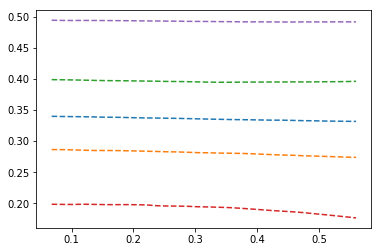

In [114]:
plt.plot(subset_temp['Z'], subset_temp['50%'], '--')
plt.plot(subset_temp['Z'], subset_temp['25%'], '--')
plt.plot(subset_temp['Z'], subset_temp['75%'], '--')
plt.plot(subset_temp['Z'], subset_temp['2.5%'], '--')
plt.plot(subset_temp['Z'], subset_temp['97.5%'], '--')
plt.show()

In [119]:
%matplotlib notebook

<IPython.core.display.Javascript object>


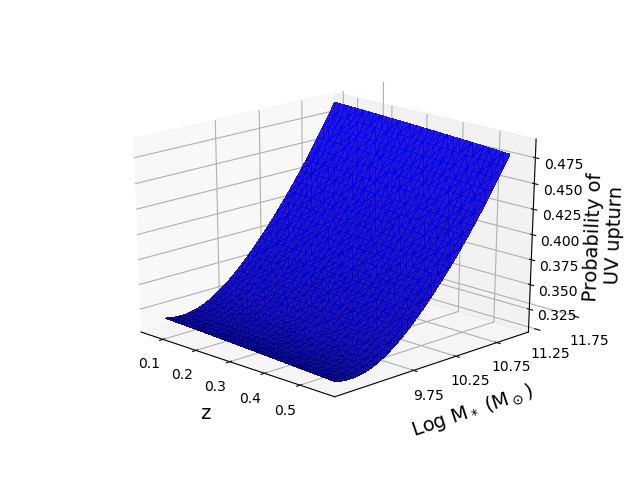

In [123]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(prob01_stan['Z'], prob01_stan['LOG_STELLAR_MASS'], prob01_stan['mean'], color='#a6611a', alpha=0.8, 
                linewidth=0, antialiased=False)
ax.plot_trisurf(prob01['Z'], prob01['LOG_STELLAR_MASS'], prob01['mean'], color='blue', alpha=0.8, 
                linewidth=0, antialiased=False)
ax.set_xlabel("\n z", fontsize=14)
ax.set_ylabel("\n Log M$_*$ (M$_\odot$)", fontsize=14)
ax.set_zlabel("\n Probability of \n UV upturn", fontsize=14)
for t in ax.yaxis.get_major_ticks(): t.label.set_fontsize(10)
ax.set_yticks([9.75, 10.25, 10.75, 11.25, 11.75])
ax.view_init(elev=22., azim=315)
plt.show()

<IPython.core.display.Javascript object>


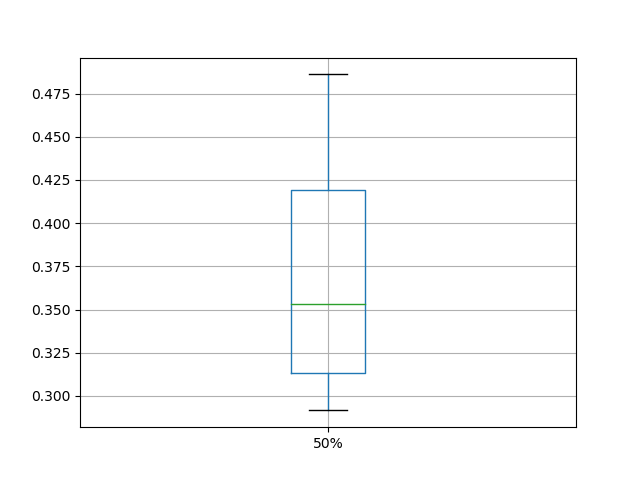

In [131]:
prob01.boxplot(column='50%')

<IPython.core.display.Javascript object>


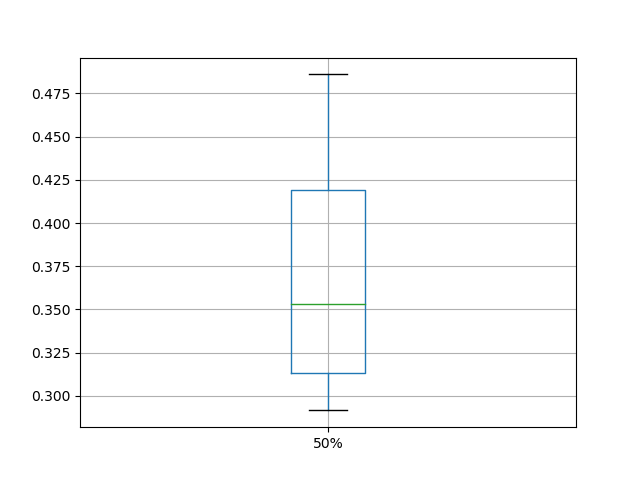

In [132]:
prob01_stan.boxplot(column='50%')